In [3]:
import numpy as np
import cv2
import glob
import mediapipe as mp

In [157]:
cap = cv2.VideoCapture('ASLens-test1/ASLens - test data 1/3ddzkmFPEBU-1-rgb_front.mp4')
i=0
ret = True
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#out = cv2.VideoWriter('output155.mp4',fourcc, 15,(1280,720))
use_frame=True
frameovi=[]
while(ret):
    ret, frame = cap.read()
    #cv2.imshow('frame',frame)
    
    if use_frame:
        if ret:
            frame=frame[:, 300:1000]
            frameovi.append(frame)
            #out.write(frame)
            i+=1

        use_frame=False
    else:
        use_frame=True



In [158]:
maxHands=1;modelComplexity=1;detectionCon=1;trackCon = 1;mode=False
maxHands = maxHands
modelComplex =modelComplexity
sedetectionCon = detectionCon
trackCon = trackCon
mpHands = mp.solutions.hands
hands = mpHands.Hands(mode,maxHands,modelComplex,detectionCon,trackCon)
hands2 = mpHands.Hands(mode,2,modelComplex,detectionCon,trackCon)
mpDraw = mp.solutions.drawing_utils

In [159]:
def findHands(img,draw=True):
    imgRGB = cv2.flip(img,1)
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.9)
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #if not self.closeStatus:
    #results = hands.process(imgRGB)
    #else:
    results = face_detection.process(imgRGB)
        #print(results.multi_hand_landmarks)
    #if results.multi_hand_landmarks:
    #    for handlms in results.multi_hand_landmarks:   
    #        if draw:
    #            mpDraw.draw_landmarks(img,handlms,mpHands.HAND_CONNECTIONS)
    if results.detections:
        for detection in results.detections:
            mp.solutions.drawing_utils.draw_detection(imgRGB, detection)
    return imgRGB

In [160]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    #smooth_landmarks=True  # Enables temporal smoothing
)

tracked_poses = {}  # Dictionary to maintain state
def detectPose(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb_frame)
    
    if results.pose_landmarks:
        # MediaPipe doesn't provide IDs for pose, but we can track them
        # by calculating center position and matching with previous frames
        landmarks = results.pose_landmarks.landmark
        center_x = sum(lm.x for lm in landmarks) / len(landmarks)
        center_y = sum(lm.y for lm in landmarks) / len(landmarks)
        
        # Simple tracking by finding closest pose in previous frame
        closest_id = None
        min_distance = float('inf')
        
        for pid, (prev_x, prev_y) in tracked_poses.items():
            distance = ((center_x - prev_x)**2 + (center_y - prev_y)**2)**0.5
            if distance < min_distance and distance < 0.1:  # Threshold
                min_distance = distance
                closest_id = pid
                
        if closest_id is None:
            closest_id = len(tracked_poses)  # Assign new ID
        
        # Update state
        tracked_poses[closest_id] = (center_x, center_y)
        
        # Draw with ID
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        cv2.putText(frame, f"ID: {closest_id}", 
                   (int(center_x * frame.shape[1]), int(center_y * frame.shape[0])),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        return frame

In [161]:
img=detectPose(frameovi[157])

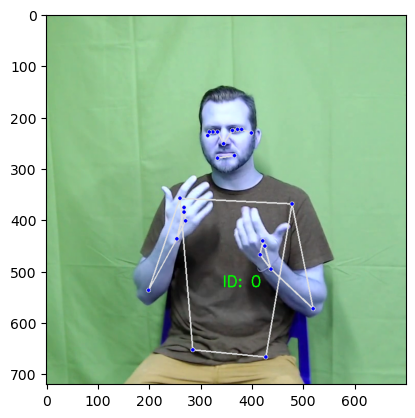

In [169]:
import matplotlib.pyplot as plt
plt.imshow(img)